                                                                  ICP-4

1. Data Manipulation

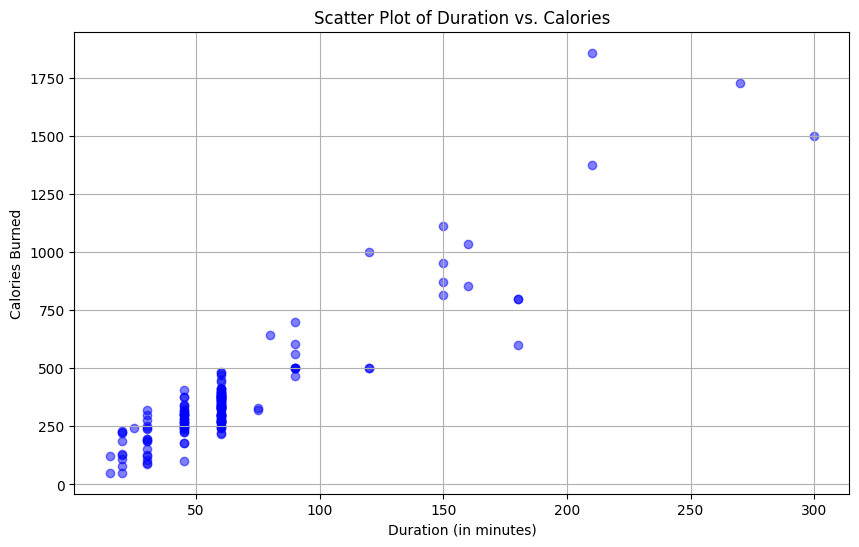

In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/data.csv')

# Display the basic statistical description about the data
basic_stats = df.describe()

# Check if the data has null values
null_values = df.isnull().sum()

# Replace the null values with the mean of their respective column
df_filled = df.fillna(df.mean())

# Aggregating data for at least two columns: min, max, count, mean
selected_columns = df_filled[['Calories', 'Pulse']]  # Example: selecting 'Calories' and 'Pulse'
aggregated_data = selected_columns.agg(['min', 'max', 'count', 'mean'])

# Filter the dataframe for calories values between 500 and 1000
filtered_500_1000 = df_filled[(df_filled['Calories'] >= 500) & (df_filled['Calories'] <= 1000)]

# Filter the dataframe for calories values > 500 and pulse < 100
filtered_calories_pulse = df_filled[(df_filled['Calories'] > 500) & (df_filled['Pulse'] < 100)]

# Creating a new "df_modified" dataframe without the "Maxpulse" column
df_modified = df_filled.drop(columns=['Maxpulse'])

# Deleting the "Maxpulse" column from the main df dataframe
df.drop(columns=['Maxpulse'], inplace=True)

# Convert the datatype of Calories column to int
df['Calories'] = pd.to_numeric(df['Calories'], downcast='integer', errors='coerce')
df['Calories'].fillna(df['Calories'].mean(), inplace=True)  # Re-fill if any NaN introduced by coercion


basic_stats, null_values, aggregated_data, filtered_500_1000.shape, filtered_calories_pulse.shape, df_modified.head(), df.head()

import matplotlib.pyplot as plt

# Creating a scatter plot for the Duration and Calories columns
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Calories'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Duration vs. Calories')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.show()



2. Linear Regression


Mean Squared Error: 21026037.329511296


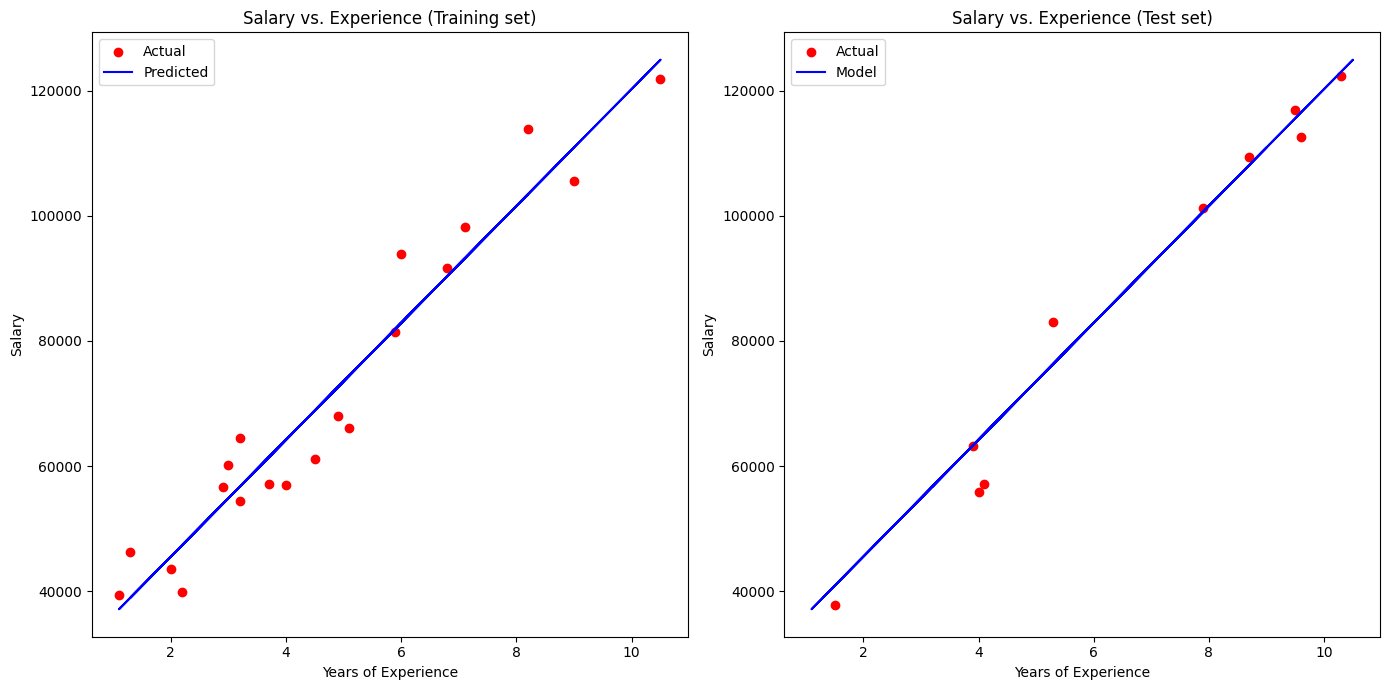

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
salary_data = pd.read_csv('/content/Salary_Data (2).csv')  # Replace with your file path

# Splitting the dataset into training and testing sets (1/3 for testing)
X = salary_data.iloc[:, :-1].values  # Features (Years of Experience)
y = salary_data.iloc[:, -1].values   # Target (Salary)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualizing the Training set results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='red', label='Actual')
plt.plot(X_train, model.predict(X_train), color='blue', label='Predicted')
plt.title('Salary vs. Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Visualizing the Test set results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_train, model.predict(X_train), color='blue', label='Model')
plt.title('Salary vs. Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

plt.tight_layout()
plt.show()
